<a href="https://colab.research.google.com/github/ydaigo/ObjectDetectionColab/blob/master/ObjectDetectionColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#セットアップ
実行に10分ほどかかります。

In [1]:
%%time
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!git clone https://github.com/ydaigo/ObjectDetectionColab.git
!sh /content/ObjectDetectionColab/setup.sh

ストリーミング出力は最後の 5000 行に切り捨てられました。
                 from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/l

#物体検出

In [3]:
#テスト画像のダウンロード
%cd /content/ObjectDetectionColab/mmdetection
import os
from mmdet.apis import init_detector, inference_detector
# Standard output of images from mmdetection is slightly rewritten for some flexibility
from utils.viz import show_result
config_path = 'configs/'
os.makedirs(os.path.dirname(config_path), exist_ok=True)
model_path = 'models/'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
img_path = 'imgs/'
os.makedirs(os.path.dirname(img_path), exist_ok=True)

!wget https://t2.ea.ltmcdn.com/en/images/8/7/3/img_5_hairless_cat_breeds_2378_600.jpg -O imgs/sphynx.png
!wget https://economia.me/i/2019/03/appliances-cabin-island-house-modern-kitchen-and-gloss-cabinets-cottage-pictures-da-color-white-rustic-small-wood-country-design-photos-beach-floors-grey-images-log-decorating.jpg -O imgs/kitchen.jpg
!wget https://s3.ap-northeast-2.amazonaws.com/open-mmlab/mmdetection/models/faster_rcnn_x101_64x4d_fpn_1x_20181218-c9c69c8f.pth -O models/faster_rcnn_x101_64x4d_fpn_1x.pth
!wget https://s3.ap-northeast-2.amazonaws.com/open-mmlab/mmdetection/models/mask_rcnn_x101_64x4d_fpn_1x_20181218-cb159987.pth -O models/mask_rcnn_x101_64x4d_fpn_1x.pth

/content/ObjectDetectionColab/mmdetection
--2020-03-09 12:37:20--  https://t2.ea.ltmcdn.com/en/images/8/7/3/img_5_hairless_cat_breeds_2378_600.jpg
Resolving t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)... 185.59.223.25
Connecting to t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)|185.59.223.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37121 (36K) [image/jpeg]
Saving to: ‘imgs/sphynx.png’

imgs/sphynx.png     100%[===================>]  36.25K  --.-KB/s    in 0.09s   

2020-03-09 12:37:20 (394 KB/s) - ‘imgs/sphynx.png’ saved [37121/37121]

--2020-03-09 12:37:23--  https://economia.me/i/2019/03/appliances-cabin-island-house-modern-kitchen-and-gloss-cabinets-cottage-pictures-da-color-white-rustic-small-wood-country-design-photos-beach-floors-grey-images-log-decorating.jpg
Resolving economia.me (economia.me)... 104.27.145.218, 104.27.144.218, 2606:4700:3034::681b:90da, ...
Connecting to economia.me (economia.me)|104.27.145.218|:443... connected.
HTTP request sent, awaiting respo

/content/ObjectDetectionColab/mmdetection/mmdet/apis/inference.py:40: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


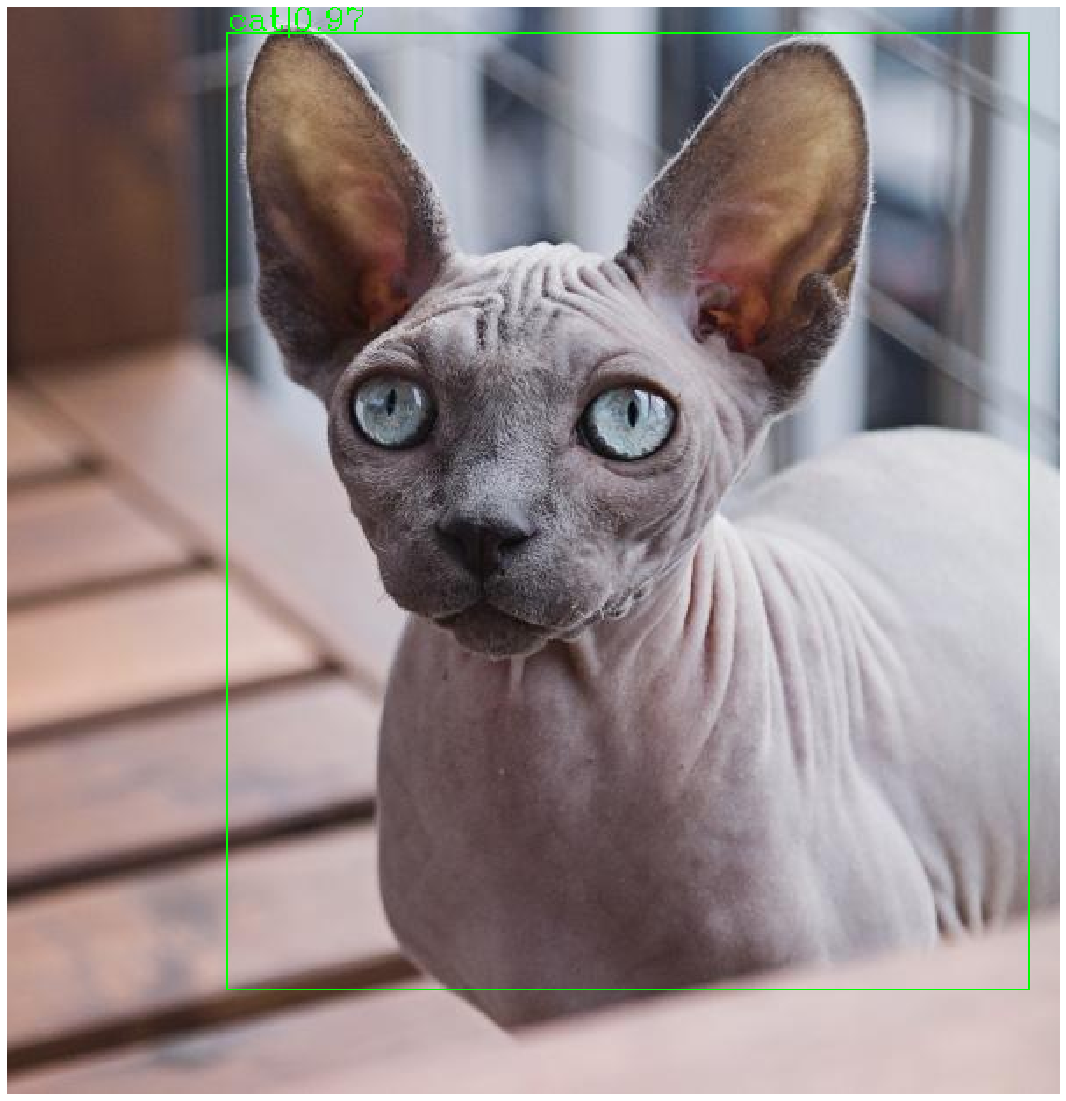

In [5]:
#モデルのロード
config_file = config_path+'faster_rcnn_x101_64x4d_fpn_1x.py'
checkpoint_file = model_path+'faster_rcnn_x101_64x4d_fpn_1x.pth'
# Loading the model from the config and saved checkpoint, inference to GPU
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [0]:
#推論1
img = 'imgs/sphynx.png'
result = inference_detector(model, img)
show_result(img, result, model.CLASSES, score_thr=0.7, font_scale=.6, thickness=1, show_mask=False)

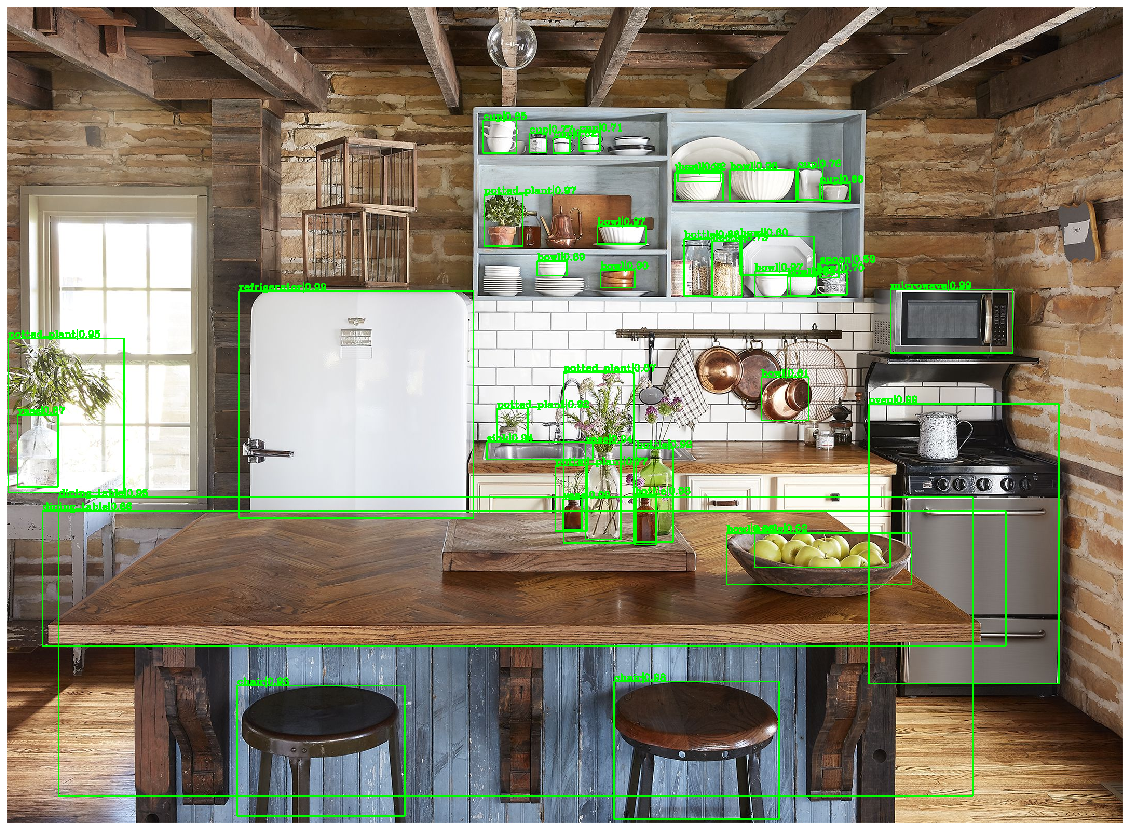

In [8]:
#推論２
img = 'imgs/kitchen.jpg'
result = inference_detector(model, img)
show_result(img, result, model.CLASSES, score_thr=0.5, font_scale=.6, thickness=2, show_mask=False)

#転移学習

In [6]:
%cd /content/ObjectDetectionColab/mmdetection
from utils.make_annot import annot
label_dict = {'Panda':1}
path_to_OID_train_imgs = '/content/ObjectDetectionColab/mmdetection/OIDv4_ToolKit/OID/Dataset/train/Panda/'
path_to_OID_valid_imgs = '/content/ObjectDetectionColab/mmdetection/OIDv4_ToolKit/OID/Dataset/validation/Panda/'

annot(path_to_OID_train_imgs, label_dict, train_data=True)
annot(path_to_OID_valid_imgs, label_dict, train_data=False)

import pickle

with open('annotations_val.pkl', 'rb') as f:
    x = pickle.load(f)

/content/ObjectDetectionColab/mmdetection
Annot train ready: ./annotations_train.pkl, len 300
Annot val ready: ./annotations_val.pkl, len 17


In [7]:
#34分かかる
%%time
!chmod +x ./tools/dist_train.sh
%cd /content/ObjectDetectionColab/mmdetection
!tools/dist_train.sh \
configs/faster_rcnn_r50_fpn_1x_our_version.py 1 --validate

/content/ObjectDetectionColab/mmdetection
2020-03-09 12:41:00,147 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Nov  7 2019, 10:44:02) [GCC 8.3.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.0, V10.0.130
GPU 0: Tesla K80
GCC: gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm

In [8]:
!wget https://d1f5hsy4d47upe.cloudfront.net/03/03887bc854356312c2c40278386690d6_t.jpeg -O imgs/pandas.jpg
!wget https://github.com/ydaigo/ObjectDetectionColab/releases/download/a/panda.pth -O models/panda12.pth

--2020-03-09 13:44:20--  https://d1f5hsy4d47upe.cloudfront.net/03/03887bc854356312c2c40278386690d6_t.jpeg
Resolving d1f5hsy4d47upe.cloudfront.net (d1f5hsy4d47upe.cloudfront.net)... 52.84.93.47, 52.84.93.87, 52.84.93.53, ...
Connecting to d1f5hsy4d47upe.cloudfront.net (d1f5hsy4d47upe.cloudfront.net)|52.84.93.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108538 (106K) [image/jpeg]
Saving to: ‘imgs/pandas.jpg’

imgs/pandas.jpg     100%[===================>] 105.99K   244KB/s    in 0.4s    

2020-03-09 13:44:21 (244 KB/s) - ‘imgs/pandas.jpg’ saved [108538/108538]

--2020-03-09 13:44:23--  https://github.com/ydaigo/ObjectDetectionColab/releases/download/a/panda.pth
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github-production-release-asset-2e65be.s3.amazonaws.com/244117975/ff61fa80-6248-11ea-817c-e2df35579d10?X-Amz-Alg

In [0]:
from mmdet.apis import init_detector, inference_detector

# Standard output of images from mmdetection is slightly rewritten for some flexibility
from utils.viz import show_result

config_file = 'configs/faster_rcnn_r50_fpn_1x_our_version.py'
checkpoint_file = '/content/ObjectDetectionColab/mmdetection/models/panda12.pth'

# Loading the model from the config and saved checkpoint, inference to GPU
model = init_detector(config_file, checkpoint_file, device='cuda:0')

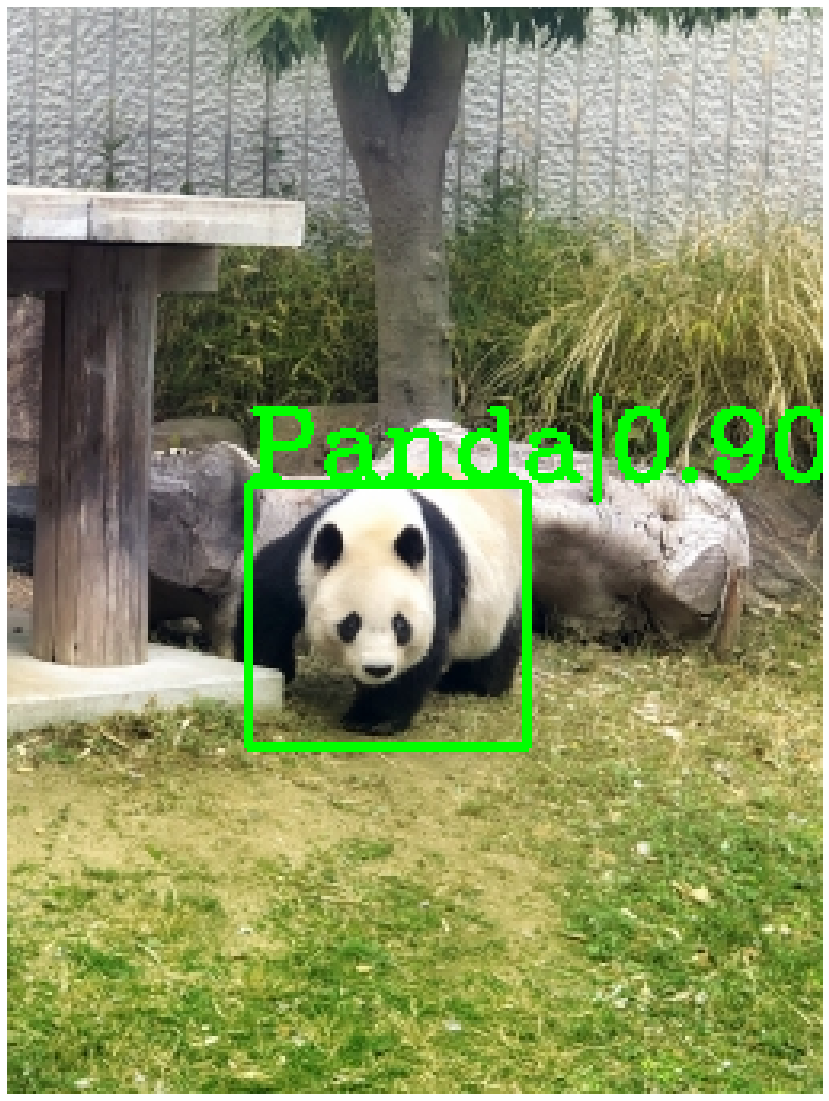

In [10]:
classes = ['Panda']
img = 'imgs/pandas.jpg'
result = inference_detector(model, img)
show_result(img, result, classes, score_thr=0.9, font_scale=1., thickness=2, show_mask=False)

#セマンティックセグメンテーション

In [5]:
#モデルのロード
config_file = config_path+'mask_rcnn_x101_64x4d_fpn_1x.py'
checkpoint_file = model_path+'mask_rcnn_x101_64x4d_fpn_1x.pth'
# Loading the model from the config and saved checkpoint, inference to GPU
model = init_detector(config_file, checkpoint_file, device='cuda:0')
#推論
img = 'imgs/kitchen.jpg'
result = inference_detector(model, img)
show_result(img, result, model.CLASSES, score_thr=0.5, font_scale=.6, thickness=2, show_mask=True)

/content/ObjectDetectionColab/mmdetection/mmdet/apis/inference.py:40: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


0
